# Probabilidad y Estadística (C)

**2019 - 2doC**

---

> # Trabajo en laboratorio 2do encuentro:
> # *Estadística descriptiva y Procesos de Poisson.*

![tp2/1.png](./img/tp2/1.png)

In [1]:
generador <- function(){
  acum <- 0
  n <- 0
  while(acum < 1){
    n <- n+1
    acum <- acum + runif(1, 0,1)
  }
  return(n)
}


In [2]:
suma <- 0
for(i in 1:300000){
    suma <- suma + generador()
}
esperanza <- suma/300000
esperanza

[1] 2.717737

![tp2/2.png](./img/tp2/2.png)

![tp2/2a.png](./img/tp2/2a.png)

In [3]:
data <- read.delim("./data/tp2/dietas.txt")
head(data)

dietaa,dietab,dietac
105,83,72
86,80,72
109,69,69
87,77,95
90,76,70
104,78,68


![tp2/2b.png](./img/tp2/2b.png)

[1] 99

[1] 98.68

[1] 98.525

[1] 98.53333

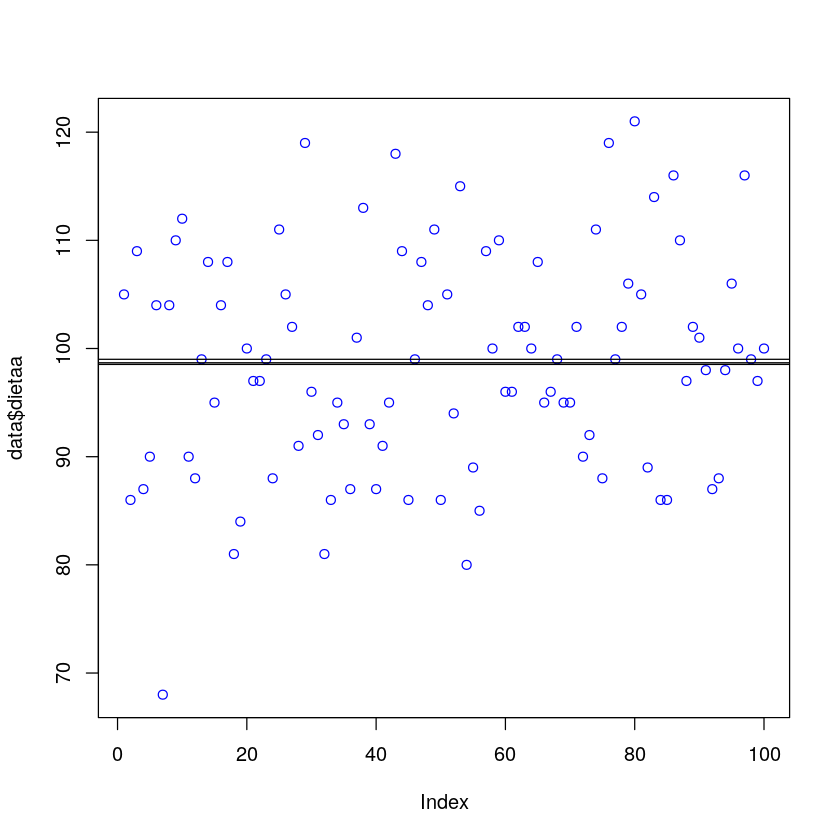

In [4]:
# Dieta A
median(data$dietaa)
mean(data$dietaa)
mean(data$dietaa, trim=0.1)
mean(data$dietaa, trim=0.2)
# Plot
plot(data$dietaa, col="blue")
abline(h=median(data$dietaa))
abline(h=mean(data$dietaa))
abline(h=mean(data$dietaa, trim=0.1))
abline(h=mean(data$dietaa, trim=0.2))

[1] 94,5

[1] 94,46

[1] 94,5

[1] 94,4

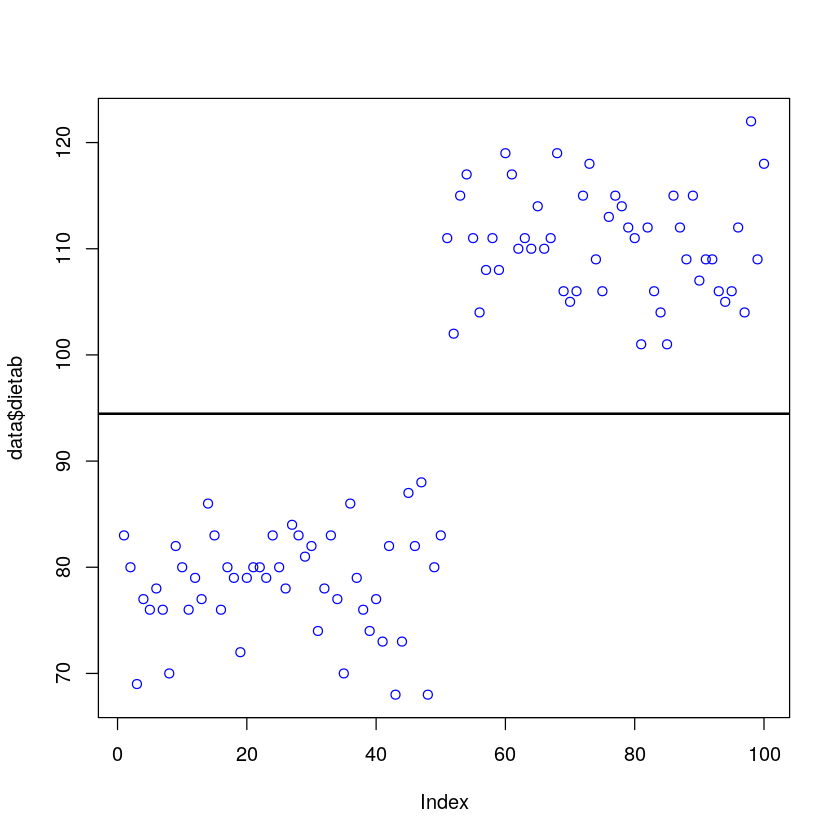

In [5]:
# Dieta B
median(data$dietab)
mean(data$dietab)
mean(data$dietab, trim=0.1)
mean(data$dietab, trim=0.2)
# Plot
plot(data$dietab, col="blue")
abline(h=median(data$dietab))
abline(h=mean(data$dietab))
abline(h=mean(data$dietab, trim=0.1))
abline(h=mean(data$dietab, trim=0.2))

[1] Dieta C
[1] Mediana:


[1] 73

[1] Media:


[1] 77,29

[1] Media podada alfa=0.1


[1] 75,3

[1] Media podada alfa=0.2


[1] 74,5

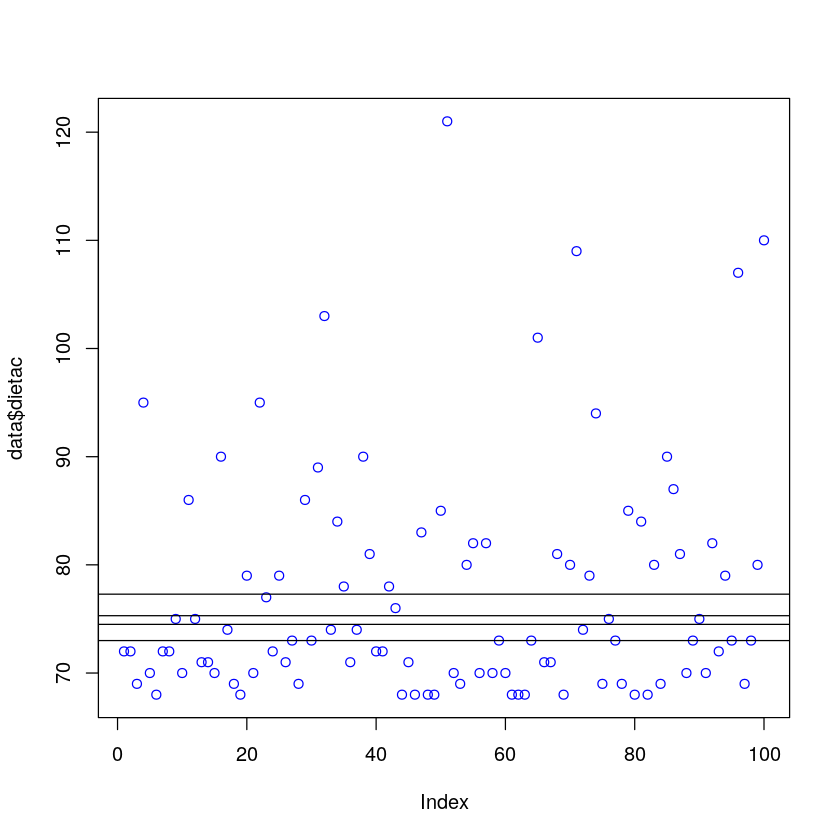

In [6]:
# Dieta C
print("Dieta C", quote=FALSE)
print("Mediana:", quote=FALSE)
median(data$dietac)
print("Media:", quote=FALSE)
mean(data$dietac)
print("Media podada alfa=0.1", quote=FALSE)
mean(data$dietac, trim=0.1)
print("Media podada alfa=0.2", quote=FALSE)
mean(data$dietac, trim=0.2)
# Plot
plot(data$dietac, col="blue")
abline(h=median(data$dietac))
abline(h=mean(data$dietac))
abline(h=mean(data$dietac, trim=0.1))
abline(h=mean(data$dietac, trim=0.2))

En la dieta C se observa una diferencia elevada entre distintas medidas, posiblemente a causa de outliers en los datos.

![tp2/2c.png](./img/tp2/2c.png)


In [7]:
dispersion <- data.frame(
    sd =rep(0,3),
    IQR=rep(0,3),
    mad=rep(0,3)
)
rownames(dispersion) <- c("dietaa",
                          "dietab",
                          "dietac")

dispersion$sd[1]  <-  sd(data$dietaa)
dispersion$IQR[1] <- IQR(data$dietaa)
dispersion$mad[1] <- mad(data$dietaa)

dispersion$sd[2]  <-  sd(data$dietab)
dispersion$IQR[2] <- IQR(data$dietab)
dispersion$mad[2] <- mad(data$dietab)

dispersion$sd[3]  <-  sd(data$dietac)
dispersion$IQR[3] <- IQR(data$dietac)
dispersion$mad[3] <- mad(data$dietac)

dispersion

,sd,IQR,mad
dietaa,"10,18404","14,50","11,1195"
dietab,"16,74552","31,25","22,9803"
dietac,"10,58329","11,00","5,9304"


La distancia intercuartil de B muestra una amplia gama de valores en los datos, que para estos datos, son valores de glucosa muy variables entre pacientes / sujetos de prueba.

![tp2/2d.png](./img/tp2/2d.png)


In [8]:
print("Dieta A", quote=FALSE)
quantile(data$dietaa, c(0.10, 0.25 ,0.50, 0.75, 0.90))
print("Dieta B", quote=FALSE)
quantile(data$dietab, c(0.10, 0.25, 0.50, 0.75, 0.90))
print("Dieta C", quote=FALSE)
quantile(data$dietac, c(0.10, 0.25, 0.50, 0.75, 0.90))

[1] Dieta A


10%    25%    50%    75%    90% 
 86,00  90,75  99,00 105,25 111,10

[1] Dieta B


10%    25%    50%    75%    90% 
 75,80  79,00  94,50 110,25 115,00

[1] Dieta C


10% 25% 50% 75% 90% 
 68  70  73  81  90

![tp2/2e.png](./img/tp2/2e.png)


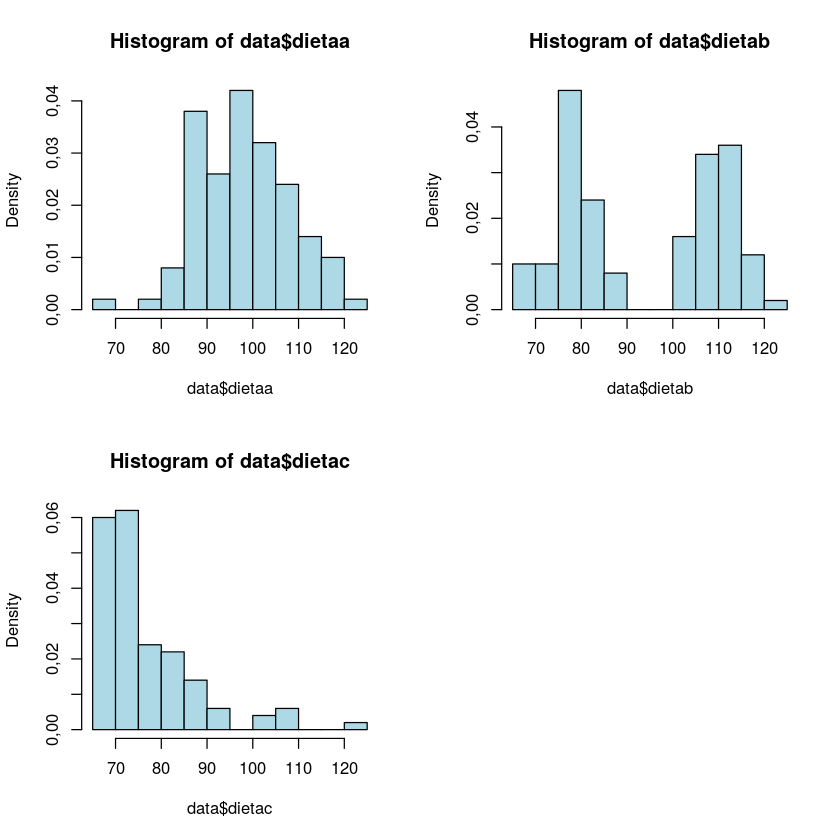

In [9]:
par(mfrow=c(2,2))
hist(data$dietaa, freq=FALSE, col="lightblue")
hist(data$dietab, freq=FALSE, col="lightblue")
hist(data$dietac, freq=FALSE, col="lightblue")

* La dieta B resulta *bimodal*, concentrándose en dos clusters de valores separados entre sí.


* La dieta C muestra valores MUY bajos de glucosa en sangre, indicio de anemia.


* En esta misma dieta, es asimétrica.


* El ajuste Normal solo parece razonable para la dieta A

![tp2/2f.png](./img/tp2/2f.png)


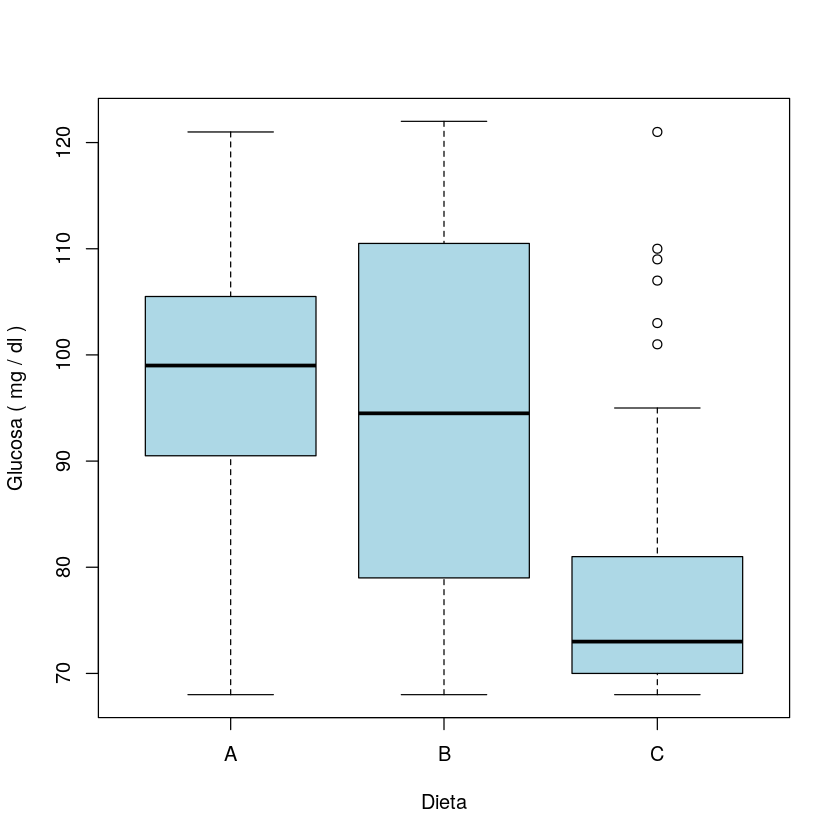

In [10]:
boxplot(data$dietaa, data$dietab, data$dietac, col="lightblue",
        xlab="Dieta", names=c("A","B","C"),
        ylab="Glucosa ( mg / dl )")

![tp2/2g.png](./img/tp2/2g.png)


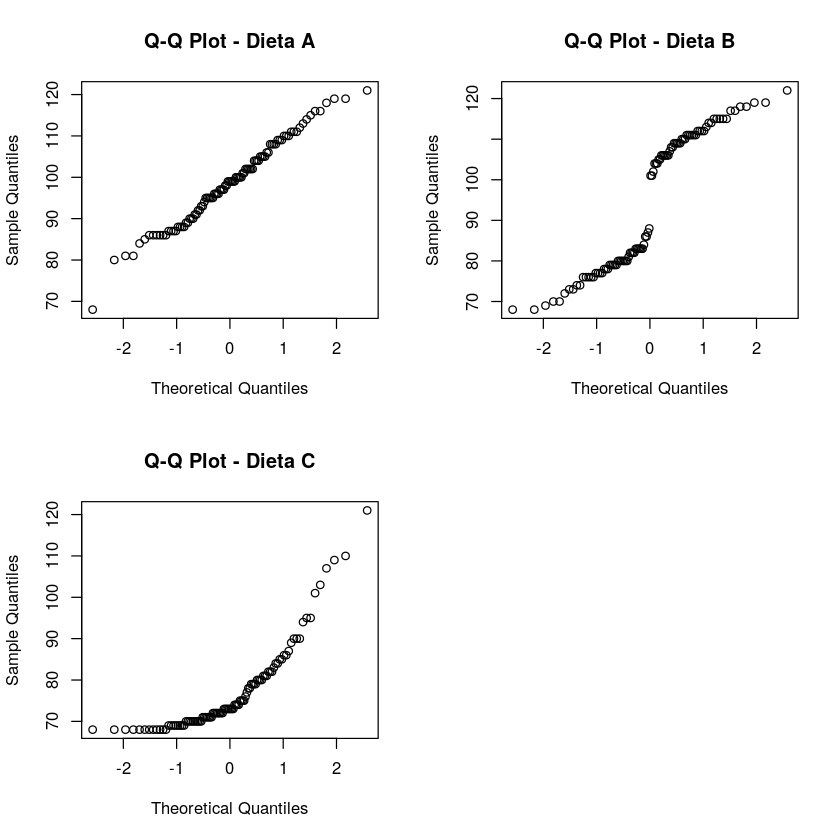

In [11]:
par(mfrow=c(2,2))
qqnorm(data$dietaa, main="Q-Q Plot - Dieta A")
qqnorm(data$dietab, main="Q-Q Plot - Dieta B")
qqnorm(data$dietac, main="Q-Q Plot - Dieta C")

![tp2/2h.png](./img/tp2/2h.png)

La dieta A parece ser la más razonable, ya que mantiene los valores en una media razonable, sin alejarnos demasiado de ella a causa de la dispersión.

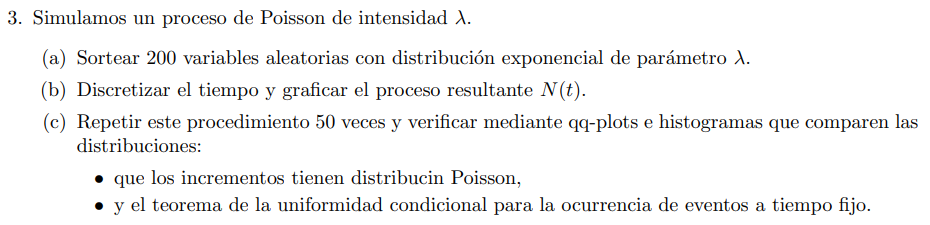

<iframe width="560" height="315" src="https://www.youtube.com/embed/jsqSScywvMc?start=557" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

https://www.youtube.com/embed/jsqSScywvMc?start=557

**a )** 200 va.iid. exponenciales con lambda=4

> $exponenciales_i \sim \varepsilon(\lambda=4)$
>
> $i \in [1, 200]$

In [12]:
cant <- 200
lambda <- 4
exponenciales <- rexp(cant, lambda)
head(exponenciales)

[1] 0,12058342 0,03087875 0,03090503 0,01734995 0,20277198 0,19385168

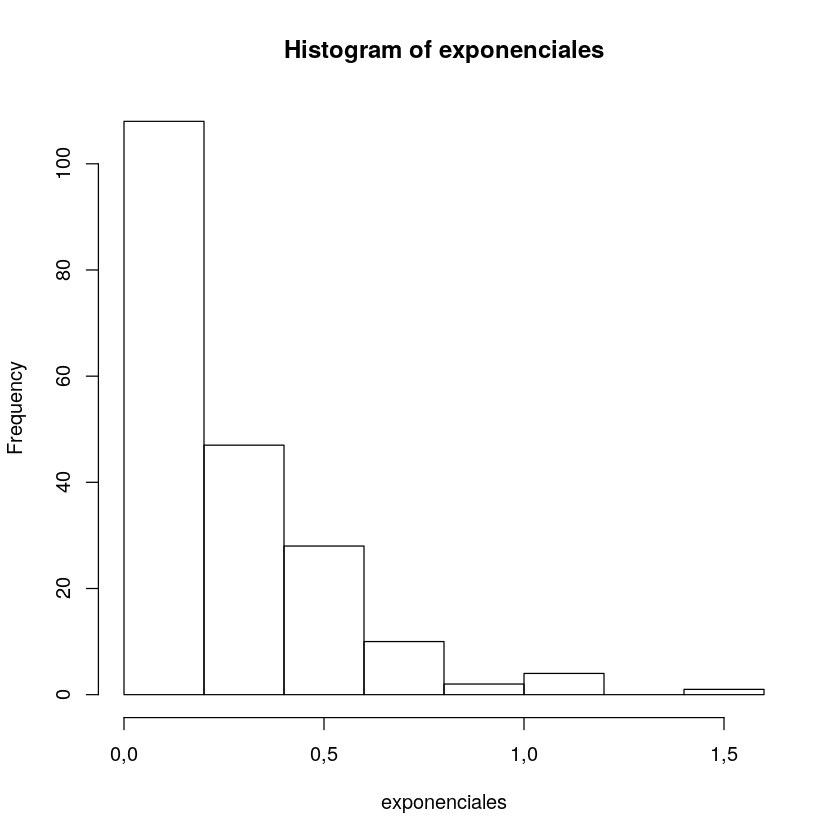

In [13]:
hist(exponenciales)

> **b )** Discretizar el tiempo y graficar el proceso resultante $N(t)$

In [14]:
obtenerExponenciales <- function(cant){
    exponenciales <- rexp(cant, lambda)
    t <- numeric(cant)
    for(i in 1:cant){
      # Discretizo tiempos como suma de exponenciales
      t[i] <- sum(exponenciales[1:i])
    }
    
    tiempos_de_parada <- data.frame(
        parada_numero = seq(1, cant, 1),
        tiempo = t
    )
    return(tiempos_de_parada)
}
# tiempos_de_parada <- data.frame(
#     parada_numero = seq(1, cant, 1),
#     tiempo = obtenerExponenciales(cant)
# )
tiempos_de_parada <- obtenerExponenciales(cant)
head(tiempos_de_parada)
tail(tiempos_de_parada)

parada_numero,tiempo
1,"0,3350908"
2,"0,8253541"
3,"0,9086996"
4,"0,9719735"
5,"1,1968862"
6,"1,3250980"


,parada_numero,tiempo
195,195,"45,17037"
196,196,"45,36304"
197,197,"46,01537"
198,198,"46,13745"
199,199,"46,23750"
200,200,"46,34047"


In [15]:
# Último evento
tail(tiempos_de_parada, n=1)

,parada_numero,tiempo
200,200,"46,34047"


In [16]:
?axis

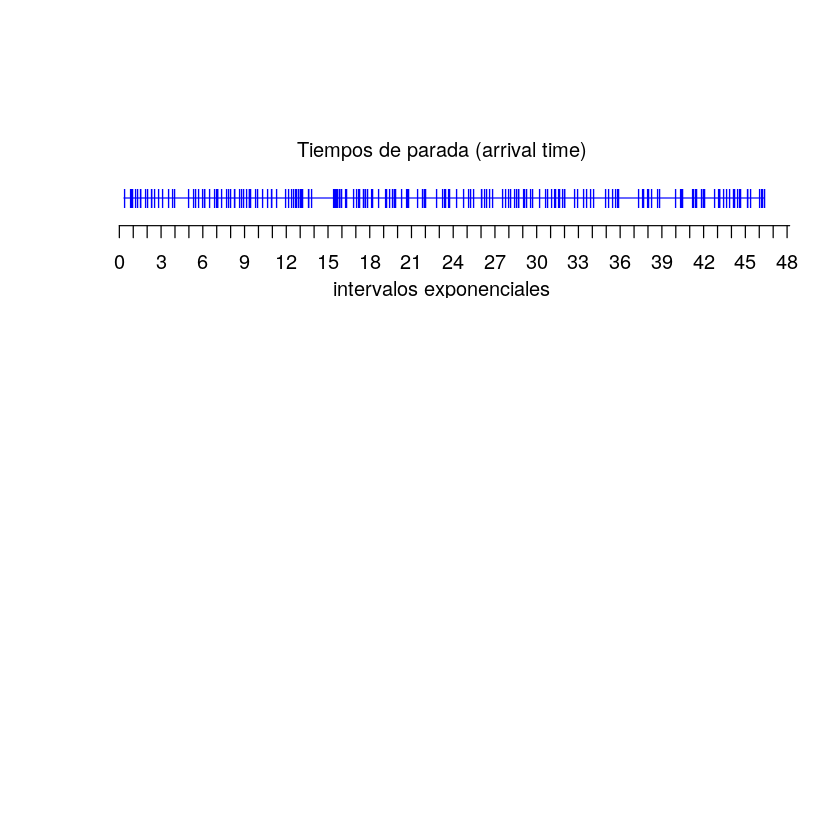

In [17]:
par(mfrow=c(2,1))

t <- tiempos_de_parada$tiempo

plot(t, rep(0, length(t)), type = 'o', pch = '|',
     ylab = '', xlab='t (segundos)',
     xaxt='n', col='blue',
     yaxt='n', ann=FALSE, bty='n')
axis(side=1, pos=c(-0.3, 0), at=seq(0, tail(t, n=1)+5, 1))
text(x=tail(t, n=1)/2, y=c(1/2, -1),
     labels=c('Tiempos de parada (arrival time)',
              'intervalos exponenciales'))


In [25]:
par(mfrow=c(2,2))
# dos formas de pensarlo:
# 1. Discretizar el intervalo de tiempo muy finamente, y 'tirar una moneda' en cada uno.
# 2. Contar eventos de cada proceso (tiempo fijo Tao) contra el total

procesoPoissonEnT <- function(tao, interval=1){
    # Cuento eventos hasta tiempo dado
    count_t <- 1
    count_int <- 1
    while(tiempos_de_parada$tiempo[count_t] < tao){
        if (tiempos_de_parada$tiempo[count_t] >= tao-interval){
            count_int <- count_int + 1
        }
        count_t <- count_t+1
    }
    respuesta_para_un_t_fijo <- count_int-1
    return(respuesta_para_un_t_fijo)
}

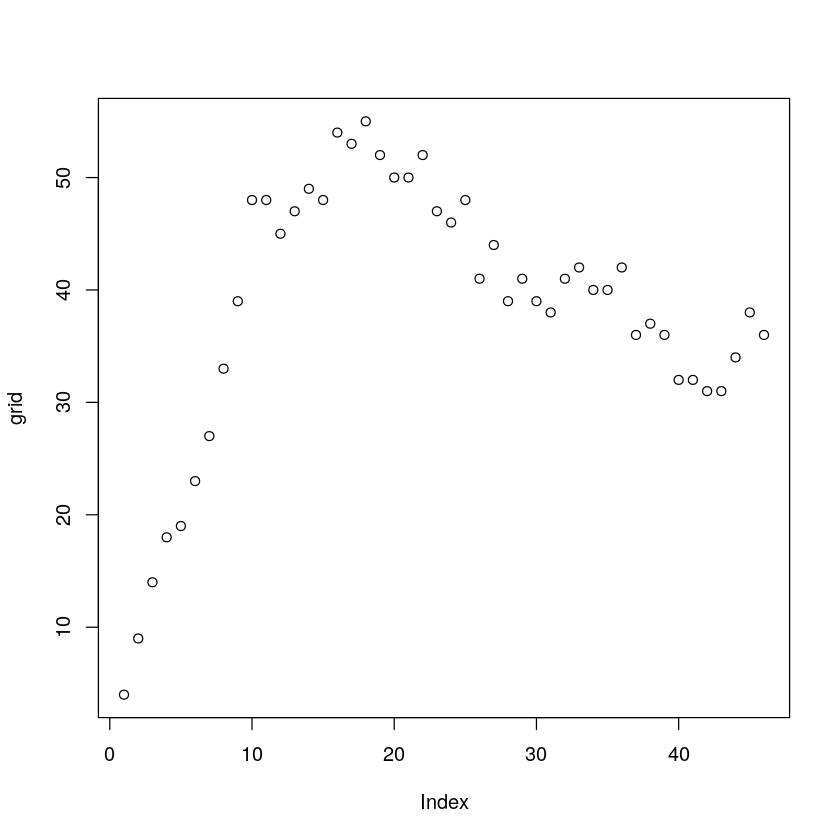

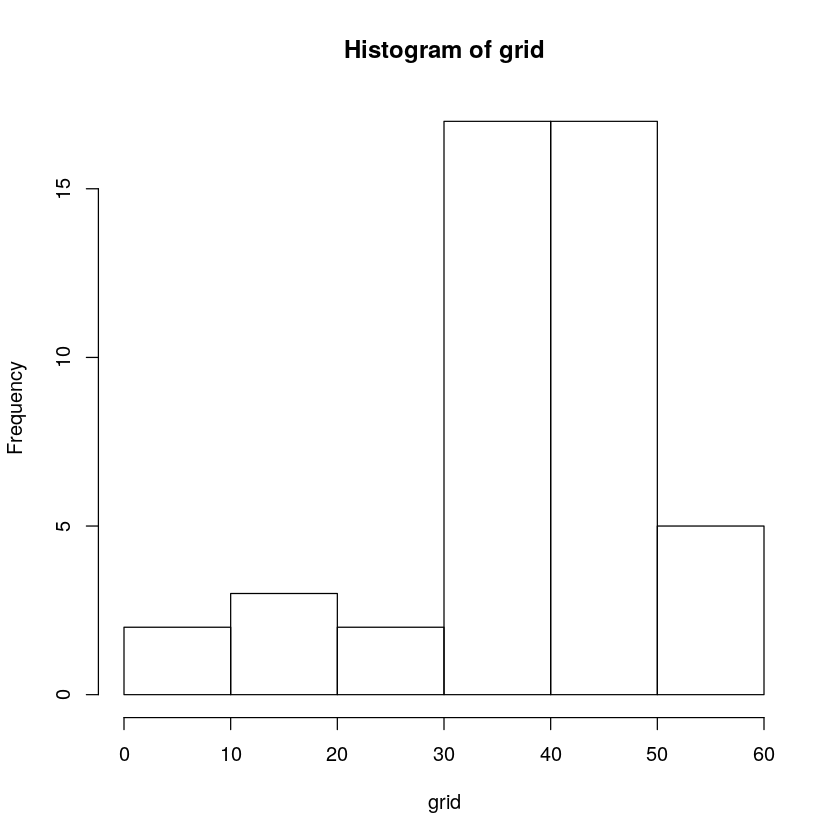

In [36]:
grid <- numeric(length(tiempos_de_parada))
for (t in seq(1, tail(tiempos_de_parada$tiempo, n=1), 1)){
    grid[t] <- procesoPoissonEnT(t, 10)
}
plot(grid)
hist(grid)

> **c )** Repetir el procedimiento 50 veces y verificar que tienen distribución Poisson

In [32]:
procesoPoisson <- function(){
    experimentos <- data.frame(
        idx = seq(1, 50),
        data <- data.frame(
                parada_numero = seq(1, cant, 1),
                tiempo        = rep(0, cant)
        )
    )
    #tiempo <- 1
    for(idx in seq(1, 50, 1)){
        experimentos[idx]$data$tiempo <- obtenerExponenciales(200)$tiempo
    }
    return (experimentos)
}



In [102]:
    experimentos <- data.frame(
        idx = seq(1, 50),
        data <- data.frame(
                parada_numero = seq(1, cant, 1),
                tiempo        = rep(0, cant)
        )
    )
experimentos[experimentos$idx == '2',]$data

NULL

In [84]:
procesoPoisson()

Warning message in `[<-.data.frame`(`*tmp*`, idx, value = structure(list(idx = c(1L, :
“provided 2 variables to replace 1 variables”Warning message in `[<-.data.frame`(`*tmp*`, idx, value = structure(list(parada_numero = c(1, :
“provided 2 variables to replace 1 variables”Warning message in `[<-.data.frame`(`*tmp*`, idx, value = structure(list(tiempo = c(0, :
“provided 2 variables to replace 1 variables”

ERROR: Error in `[.data.frame`(`*tmp*`, idx): undefined columns selected


In [69]:
experimentos3
experimentos3 <- procesoPoisson()
#head(experimentos3)
plot(experimentos3)
hist(experimentos3)



idx,parada_numero,tiempo,data
1,1,54,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200"
2,2,54,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200"
3,3,54,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200"
4,4,54,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200"
5,5,54,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93,

Warning message in experimentos$data[ex] <- obtenerExponenciales(200):
“number of items to replace is not a multiple of replacement length”Warning message in experimentos$data[ex] <- obtenerExponenciales(200):
“number of items to replace is not a multiple of replacement length”Warning message in experimentos$data[ex] <- obtenerExponenciales(200):
“number of items to replace is not a multiple of replacement length”Warning message in experimentos$data[ex] <- obtenerExponenciales(200):
“number of items to replace is not a multiple of replacement length”Warning message in experimentos$data[ex] <- obtenerExponenciales(200):
“number of items to replace is not a multiple of replacement length”Warning message in experimentos$data[ex] <- obtenerExponenciales(200):
“number of items to replace is not a multiple of replacement length”Warning message in experimentos$data[ex] <- obtenerExponenciales(200):
“number of items to replace is not a multiple of replacement length”Warning message in experime

ERROR: Error in data.matrix(x): (list) object cannot be coerced to type 'double'


In [54]:
experimentos3 <- experimentos3 / 50
hist(experimentos3)
plot(experimentos3)

ERROR: Error in experimentos3/50: non-numeric argument to binary operator


In [63]:

experimentos3[28]

[[1]]
  [1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
[127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
[145] 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
[163] 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
[181] 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
[199] 199 200

In [85]:
obtenerExponenciales(200)$tiempo

[1]  0,05088861  0,12755158  0,17223319  0,46585965  0,54346859  1,05657041
  [7]  1,07727639  1,15555823  1,37703242  1,64924816  1,98238217  2,37023384
 [13]  2,65250327  3,09545502  3,09655839  3,27641204  3,30979116  3,61505895
 [19]  3,73693385  3,78565464  3,97875945  4,05872685  4,27806354  4,28255262
 [25]  4,55418245  4,67845687  4,78972698  5,16395056  5,83018060  6,27483414
 [31]  6,30785649  6,65931064  6,66269063  7,08485011  7,10819704  7,46727391
 [37]  7,48301991  8,57316571  8,80017361  8,95948523  9,00097868  9,04631514
 [43]  9,45372519  9,55279881  9,65306661  9,81004916  9,93735078 10,05877047
 [49] 10,20181645 10,32354481 10,38042664 10,44003550 10,96840153 11,13713273
 [55] 11,41249744 11,96808247 13,22987090 13,37228901 13,38259356 13,70190375
 [61] 13,72209294 13,82016958 13,84074477 13,84393721 14,02955624 14,61332678
 [67] 15,08232348 15,16845733 15,49199832 15,54057906 15,54672248 16,06550152
 [73] 16,32186043 16,38734460 16,40294889 16,46328628 16,60221217 16,78829322
 [79] 17,28971896 18,00195221 18,00988649 18,12773099 18,23162791 18,36045069
 [85] 18,85689536 18,95357870 19,06877722 19,83154148 19,96271902 20,23192843
 [91] 20,34294118 20,37230870 20,45943825 20,93458738 21,12179474 21,31452344
 [97] 21,39757809 21,51419561 21,91368788 23,08216063 23,17074422 23,37930800
[103] 23,69958644 23,74860823 23,88911272 23,93003913 24,17230785 24,44714117
[109] 24,52004454 24,88594827 25,16984701 25,61481040 25,64202377 25,92552639
[115] 26,07201909 26,77697850 26,96024371 27,38673799 27,53542254 28,45073193
[121] 28,47251367 28,50764504 28,95111401 28,99975653 29,33827021 29,61360763
[127] 30,05392498 30,33440099 30,44990583 30,87911657 30,90013983 30,98574076
[133] 30,99958589 31,20228353 31,48646286 31,65804204 31,66166197 31,66475386
[139] 31,67272824 31,82227998 32,38857892 32,53350508 32,57217704 32,63542414
[145] 32,72396887 32,83296667 33,21219587 33,21714291 33,43175579 33,45050107
[151] 34,87076195 35,30288628 35,44817021 36,05684237 36,54528088 36,98747578
[157] 37,14219442 37,22017109 37,30112324 37,37844692 37,51738864 37,72191192
[163] 37,76626097 37,79350508 38,12418602 38,78825269 39,09619502 39,23580932
[169] 39,28779518 39,51012556 39,81374509 39,97706804 40,29297980 40,72581277
[175] 40,76983101 40,82417925 40,89158491 41,43002138 41,45330863 41,55421055
[181] 41,76011431 41,93775625 42,14018665 42,72121807 42,73805034 42,76024647
[187] 42,80239810 43,59543982 43,65215422 43,99432091 44,07068059 44,08921498
[193] 44,62164076 44,82034886 44,96949401 45,66850328 45,85164767 46,28900308
[199] 46,35750188 46,86725538